In [1]:
import pandas as pd
df1_user = pd.read_csv('C:/Users/jaag1/Downloads/user_reviews.csv')
df2_app = pd.read_csv('C:/Users/jaag1/Downloads/apps.csv')
df1_user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
df2_app.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
import pandas as pd

# Load the datasets
df1_user = pd.read_csv('C:/Users/jaag1/Downloads/user_reviews.csv')
df2_app = pd.read_csv('C:/Users/jaag1/Downloads/apps.csv')

# Display the first few rows of the datasets
print(df1_user.head())
print(df2_app.head())

# Clean and correct data types for df2_app
df2_app['Rating'] = pd.to_numeric(df2_app['Rating'], errors='coerce')
df2_app['Reviews'] = pd.to_numeric(df2_app['Reviews'], errors='coerce')

# Handle 'Size' column
df2_app['Size'] = df2_app['Size'].astype(str)
df2_app['Size'] = df2_app['Size'].replace('Varies with device', '0').str.replace('M', 'e6').str.replace('k', 'e3')
df2_app['Size'] = pd.to_numeric(df2_app['Size'], errors='coerce')

# Handle 'Installs' column
df2_app['Installs'] = df2_app['Installs'].astype(str)
df2_app['Installs'] = df2_app['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Handle 'Price' column
df2_app['Price'] = df2_app['Price'].str.replace('$', '').astype(float)

# Handle missing data
df2_app = df2_app.dropna()
df1_user = df1_user.dropna()

# Drop the 'Unnamed: 0' column
df2_app = df2_app.drop(columns=['Unnamed: 0'])


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                            

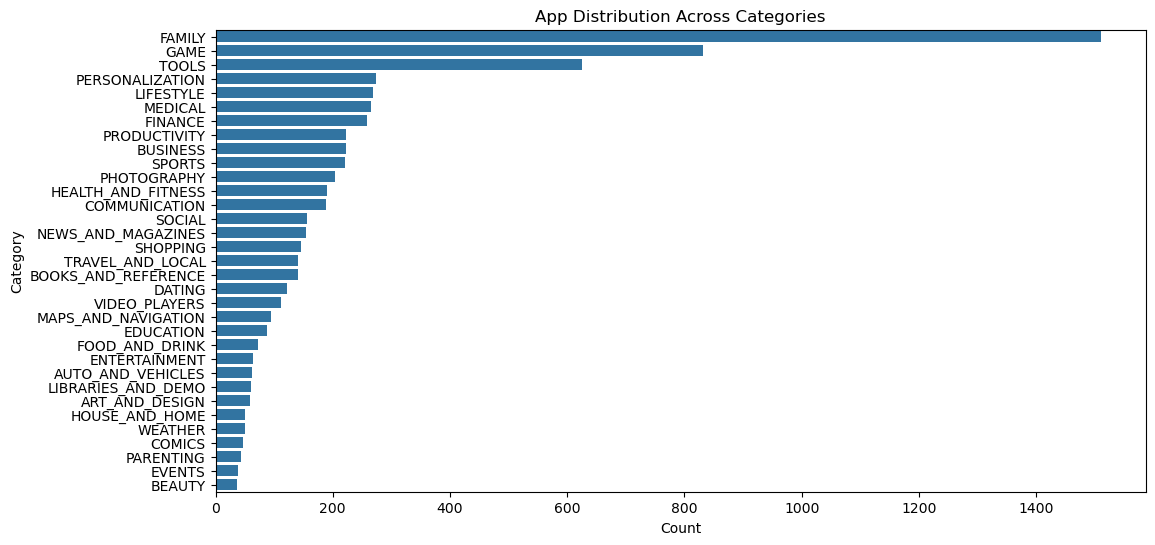

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Investigate app distribution across categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df2_app, y='Category', order=df2_app['Category'].value_counts().index)
plt.title('App Distribution Across Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


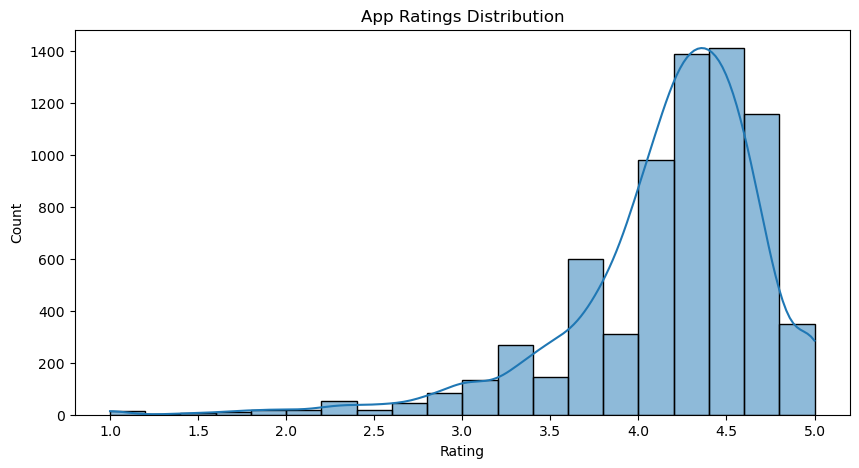

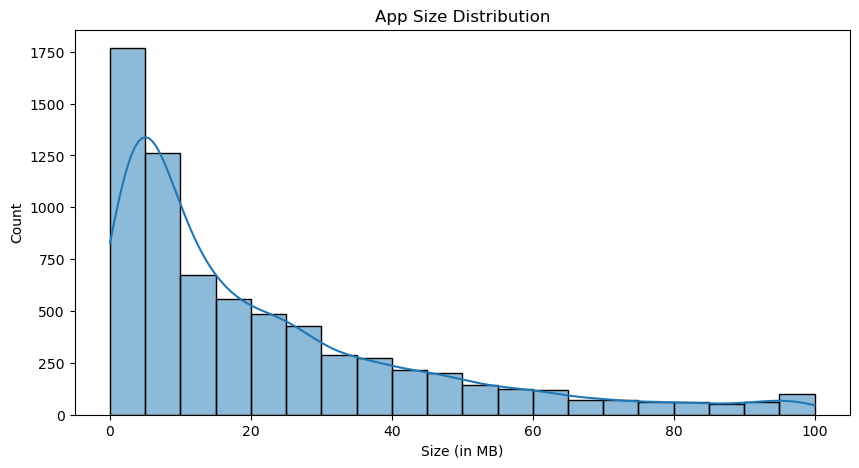

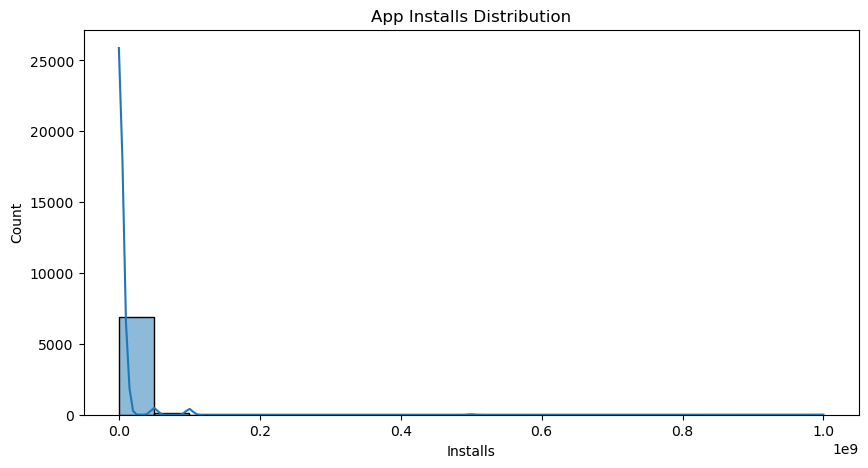

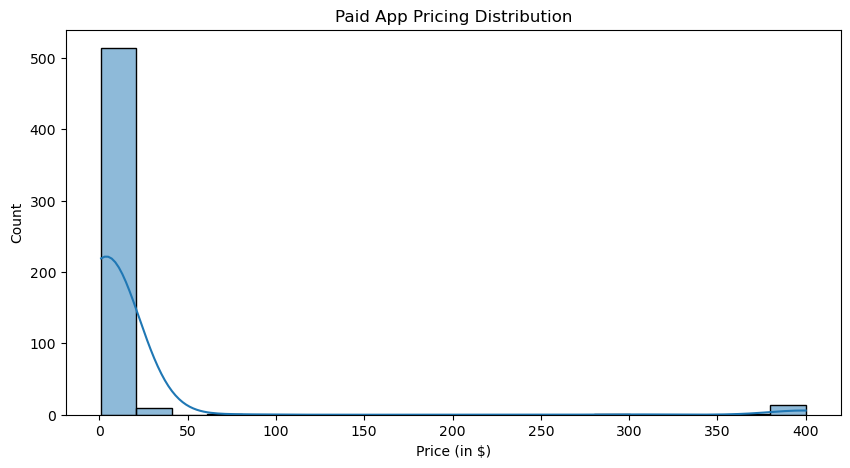

In [15]:
# Examine app ratings
plt.figure(figsize=(10, 5))
sns.histplot(df2_app['Rating'], bins=20, kde=True)
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Analyze app size
plt.figure(figsize=(10, 5))
sns.histplot(df2_app['Size'], bins=20, kde=True)
plt.title('App Size Distribution')
plt.xlabel('Size (in MB)')
plt.ylabel('Count')
plt.show()

# Popularity trends (Installs)
plt.figure(figsize=(10, 5))
sns.histplot(df2_app['Installs'], bins=20, kde=True)
plt.title('App Installs Distribution')
plt.xlabel('Installs')
plt.ylabel('Count')
plt.show()

# Pricing trends
plt.figure(figsize=(10, 5))
sns.histplot(df2_app[df2_app['Price'] > 0]['Price'], bins=20, kde=True)
plt.title('Paid App Pricing Distribution')
plt.xlabel('Price (in $)')
plt.ylabel('Count')
plt.show()


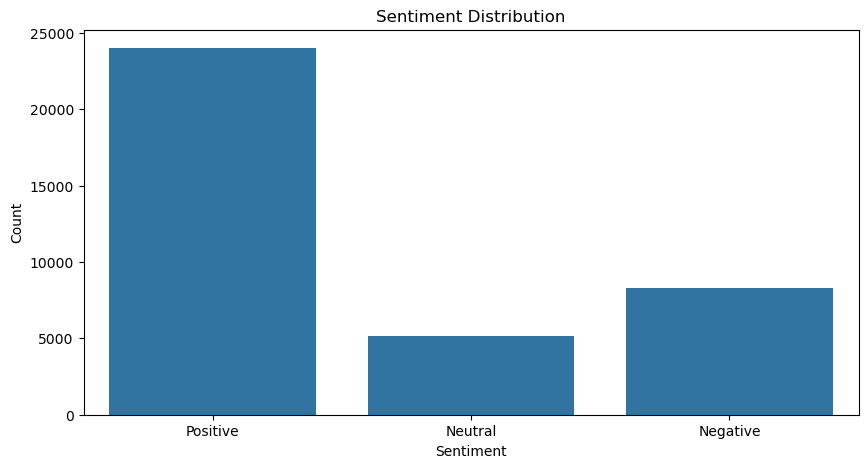

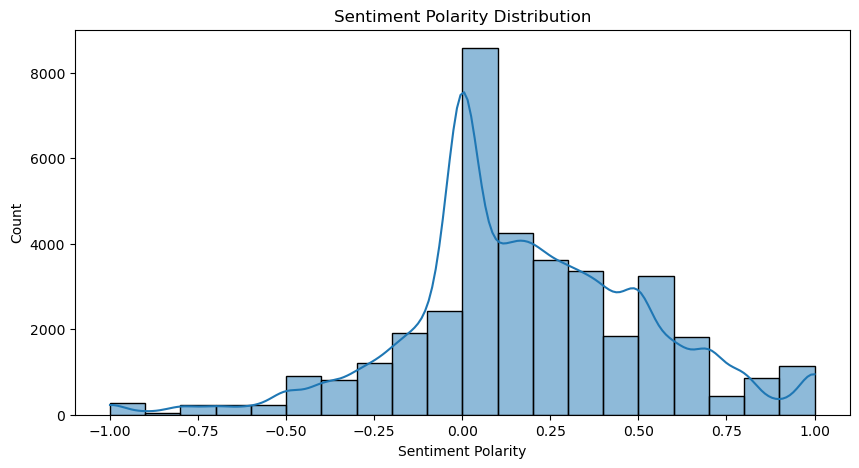

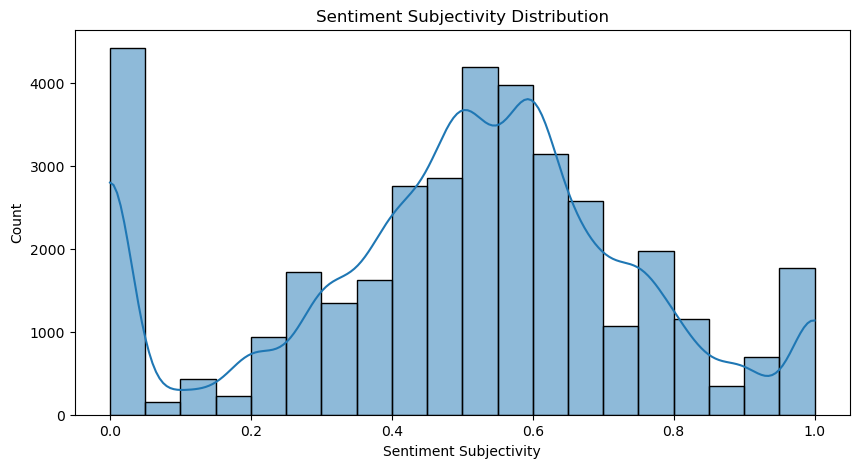

In [17]:
# Assess user sentiments through reviews
plt.figure(figsize=(10, 5))
sns.countplot(data=df1_user, x='Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Sentiment polarity distribution
plt.figure(figsize=(10, 5))
sns.histplot(df1_user['Sentiment_Polarity'], bins=20, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

# Sentiment subjectivity distribution
plt.figure(figsize=(10, 5))
sns.histplot(df1_user['Sentiment_Subjectivity'], bins=20, kde=True)
plt.title('Sentiment Subjectivity Distribution')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Count')
plt.show()


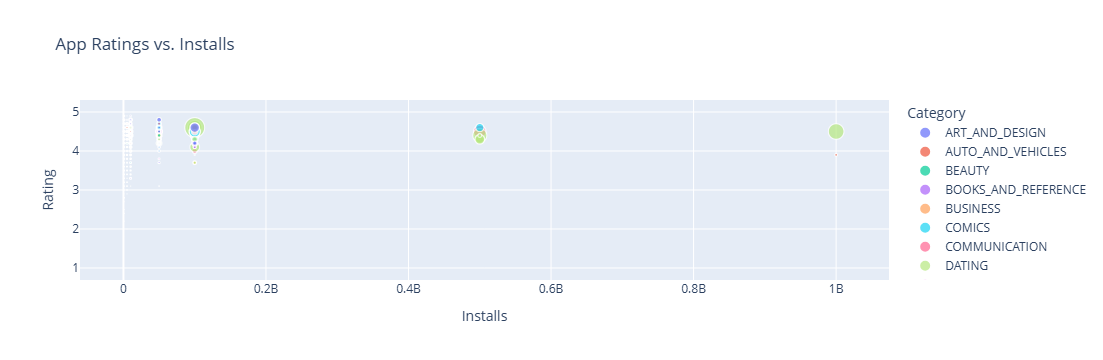

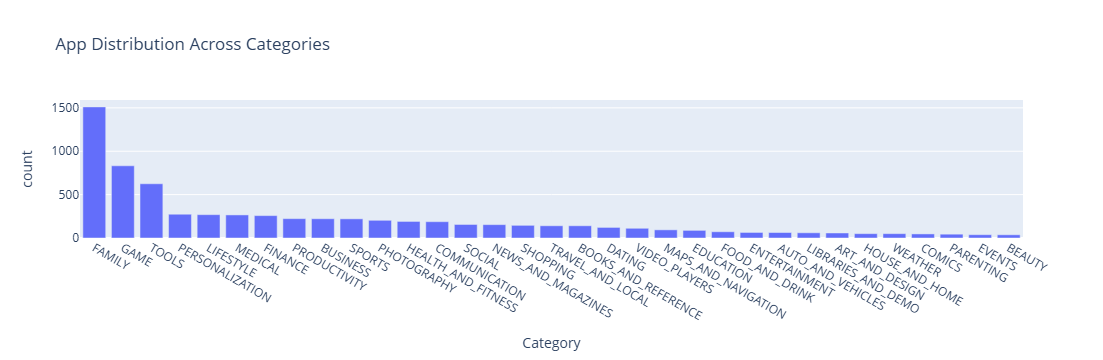

In [21]:
import plotly.express as px

# Interactive scatter plot for Ratings vs. Installs
fig = px.scatter(df2_app, x='Installs', y='Rating', color='Category', size='Reviews', title='App Ratings vs. Installs')
fig.show()

# Interactive bar plot for Category distribution
category_counts = df2_app['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'count']

fig = px.bar(category_counts, x='Category', y='count', title='App Distribution Across Categories')
fig.show()
